In [154]:
## Import libraries
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [165]:
# set styles for plots
sns.set_style('whitegrid')
plt.style.use('ggplot')
colors=['#cd1076','#00008b','#00e5ee','#008080','#cd5555']

In [69]:
# Load dataset 
data = pd.read_csv('customer_data.csv')

In [70]:
data.head()

,Transaction_date,Transaction_ID,Gender,Age,Marital_status,State_names,Segment,Employees_status,Payment_method,Referal,Amount_spent
0,1/1/2019,151200,Female,19.0,Single,Kansas,Basic,Unemployment,Other,1.0,2051.36
1,1/1/2019,151201,Male,49.0,Single,Illinois,Basic,self-employed,Card,0.0,544.04
2,1/1/2019,151202,Male,63.0,Married,New Mexico,Basic,workers,PayPal,1.0,1572.60
3,1/1/2019,151203,NaN,18.0,Single,Virginia,Platinum,workers,Card,1.0,1199.79
4,1/1/2019,151204,Male,27.0,Single,Connecticut,Basic,self-employed,Card,0.0,NaN


In [73]:
data.drop(['Transaction_ID'],axis=1,inplace=True)

In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction_date  2512 non-null   object 
 1   Gender            2484 non-null   object 
 2   Age               2470 non-null   float64
 3   Marital_status    2512 non-null   object 
 4   State_names       2512 non-null   object 
 5   Segment           2512 non-null   object 
 6   Employees_status  2486 non-null   object 
 7   Payment_method    2512 non-null   object 
 8   Referal           2357 non-null   float64
 9   Amount_spent      2270 non-null   float64
dtypes: float64(3), object(7)
memory usage: 196.4+ KB


In [88]:
#change transaction date to datetime
data['Transaction_date'] =pd.to_datetime(data['Transaction_date'])

In [75]:
# chech missing values
data.isnull().sum()

Transaction_date      0
Gender               28
Age                  42
Marital_status        0
State_names           0
Segment               0
Employees_status     26
Payment_method        0
Referal             155
Amount_spent        242
dtype: int64

### Treating missing values

In [76]:
# function to treat missing values
def missing_value(df):
    for col in df:
        # mode imputation
        if df[col].dtypes in ['object']:
            if df[col].isnull().any():
                df[col] = df[col].fillna(df[col].mode()[0])
        # mean imputation
        else:
            if df[col].isnull().any():
                df[col] = df[col].fillna(df[col].mean())
missing_value(data)

In [77]:
data.isna().sum()

Transaction_date    0
Gender              0
Age                 0
Marital_status      0
State_names         0
Segment             0
Employees_status    0
Payment_method      0
Referal             0
Amount_spent        0
dtype: int64

In [78]:
# descriptive statistics
data.describe()

,Age,Referal,Amount_spent
count,2512.000000,2512.000000,2512.000000
mean,46.637652,0.652100,1418.422577
std,18.033540,0.461467,835.101648
min,15.000000,0.000000,2.090000
25%,32.000000,0.000000,734.862500
50%,46.637652,1.000000,1418.422577
75%,62.000000,1.000000,1955.997500
max,78.000000,1.000000,2999.980000


## Exploratory Analysis

### Univariate Variable analysis

In [89]:
#let's divide the dataset into categorical and numerical variables
category = []
continuous = []

for col in data:
    if data[col].dtypes in ['object']:
        category.append(col)
    elif data[col].dtypes in ['float64','int64']:
        continuous.append(col)
        

In [90]:
#categorical variables
category

['Gender',
 'Marital_status',
 'State_names',
 'Segment',
 'Employees_status',
 'Payment_method']

In [91]:
#continuous variables
continuous

['Age', 'Referal', 'Amount_spent']

#### Categorical Variable

In [166]:
def bar_plot(variable):
    var = data[variable]
    varValue = var.value_counts()
    plt.figure(figsize=(8,4))
    plt.bar(varValue.index, varValue, color=colors)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("Count")
    plt.title(variable)
    plt.xticks(rotation=90)
    plt.tight_layout()
    
    for i, count in enumerate(varValue):
        plt.annotate(count,xy=(i,varValue[i]),ha='center')
    
    plt.show()
    
    

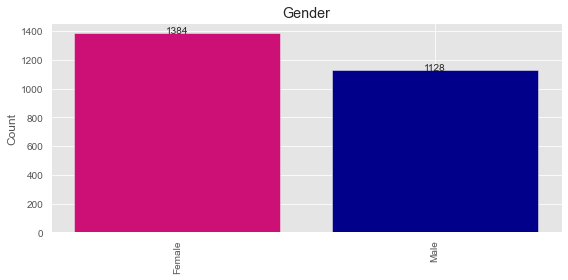

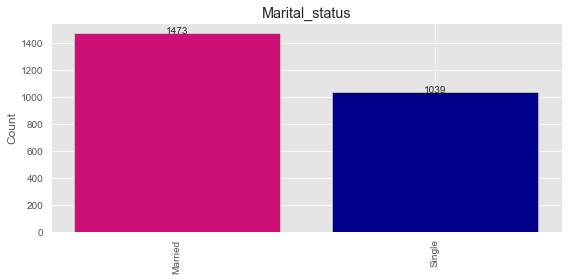

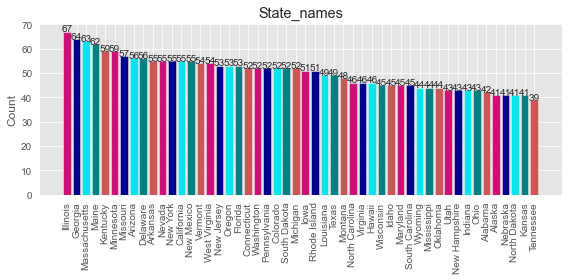

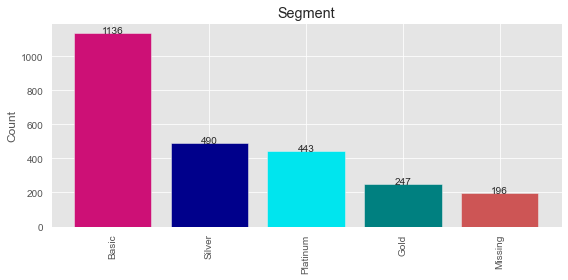

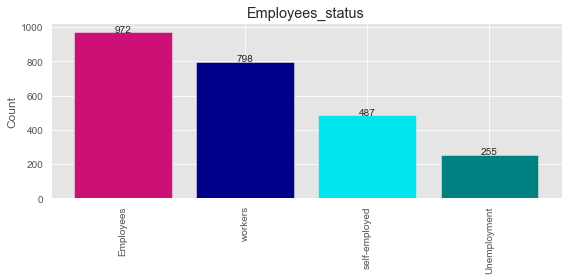

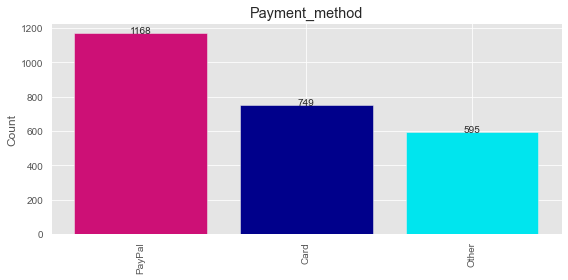

In [167]:
# plot categorical variables
for c in category:
    bar_plot(c)

### Numerical variables

In [168]:
def plot_hist(variable):
    plt.figure(figsize=(9,4))
    plt.hist(data[variable],bins=40,color='#cd1076')
    plt.xlabel(variable)
    plt.ylabel('Frequency')
    plt.title("{} distribution with hist".format(variable))
    plt.tight_layout()
    plt.show()

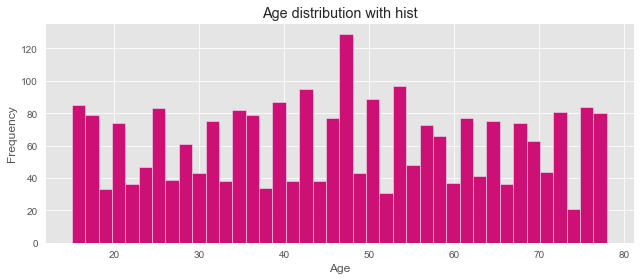

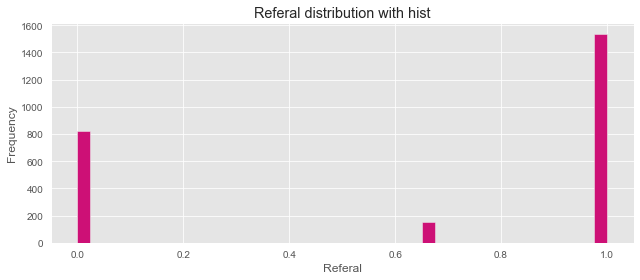

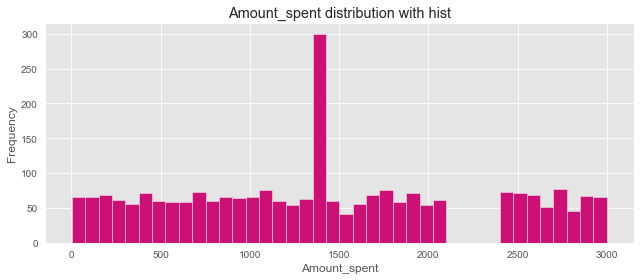

In [169]:
# hist plot of the continuous variables
for n in continuous:
    plot_hist(n)

### Transaction date against the amount spent

In [141]:
data[['Transaction_date','Amount_spent']].sort_values(by=['Amount_spent'],ascending=False)[:10]

,Transaction_date,Amount_spent
17,2019-01-07,2999.98
485,2019-06-07,2998.62
2279,2021-02-15,2997.21
589,2019-07-13,2997.15
743,2019-08-30,2996.82
2367,2021-03-15,2995.73
101,2019-02-06,2989.33
1254,2020-02-16,2988.13
1123,2020-01-05,2987.96
1177,2020-01-18,2985.70


### Categorical distribution of the Amount spent

In [170]:
def barplot(variable):
    plt.figure(figsize=(9,5))
    sns.barplot(data[variable],data['Amount_spent'],hue=data['Gender'], data=data)
    plt.xlabel(variable)
    plt.ylabel('Amount')
    plt.xticks(rotation=90)
    plt.tight_layout()
    
    
    plt.show()
    

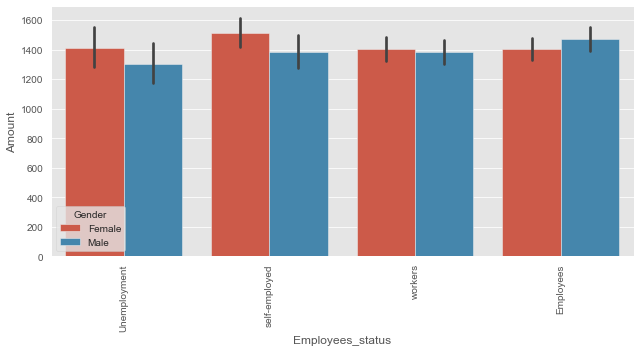

In [171]:
# Amount spent distribution by Employees status
barplot('Employees_status')

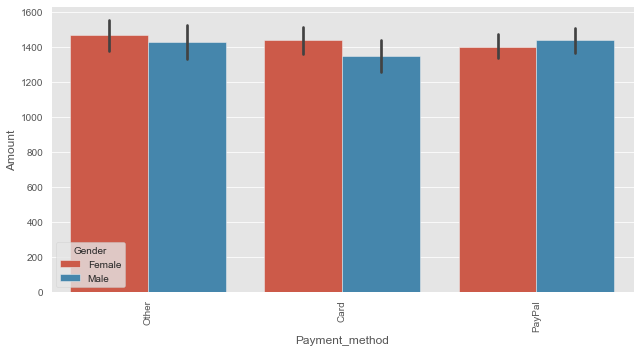

In [172]:
# by Payment_method
barplot('Payment_method')

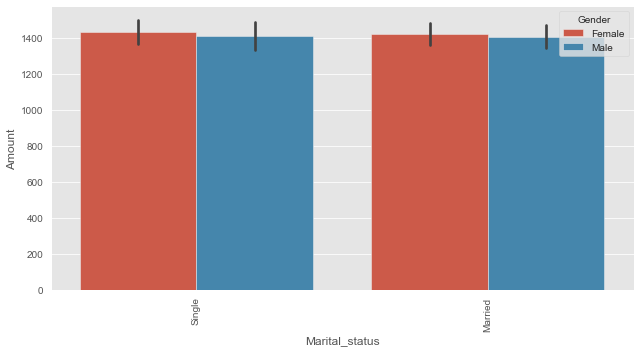

In [173]:
# by marital status
barplot('Marital_status')

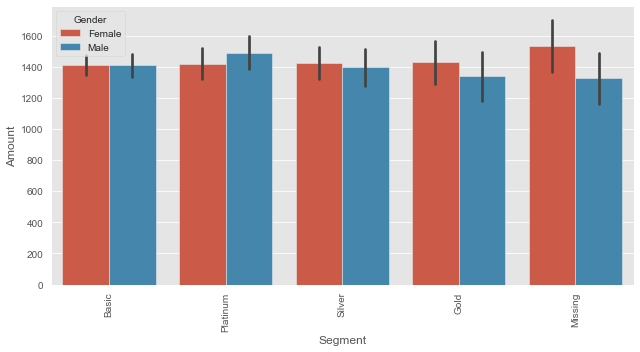

In [174]:
# by segment
barplot('Segment')

#### visualizing the continuous variables

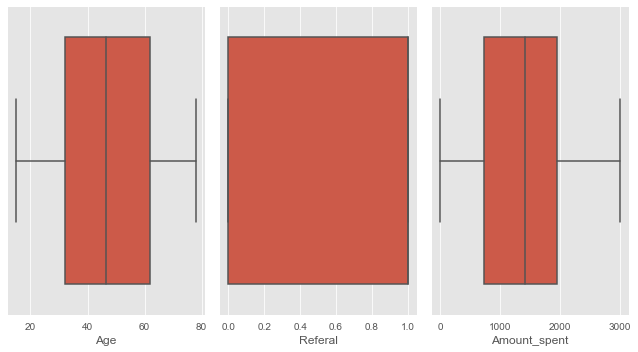

In [175]:
fig,axs = plt.subplots(nrows=1, ncols=3, figsize=(9,5))
axs = axs.flatten()

for i, var in enumerate(continuous):
    sns.boxplot(x=var,data=data, ax=axs[i])
   
fig.tight_layout()

plt.show()

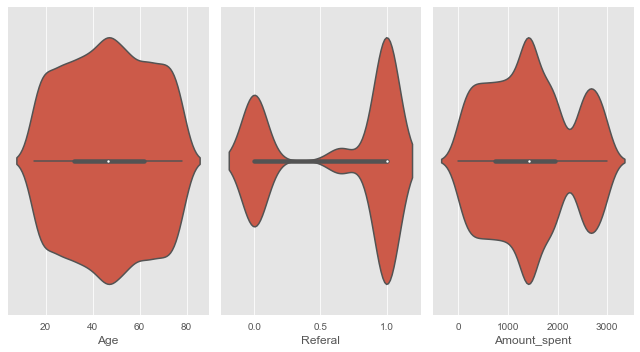

In [176]:
fig,axs = plt.subplots(nrows=1, ncols=3, figsize=(9,5))
axs = axs.flatten()

for i, var in enumerate(continuous):
    sns.violinplot(x=var,data=data, ax=axs[i])
   
fig.tight_layout()

plt.show()

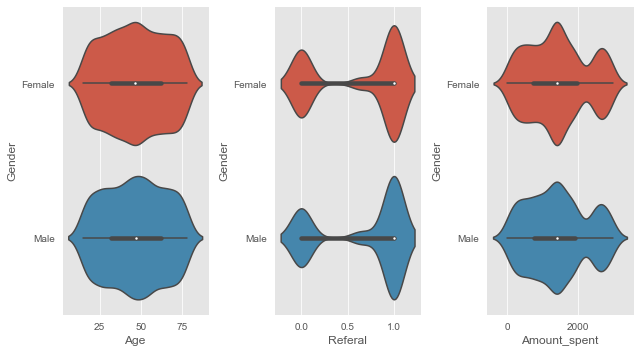

In [177]:
fig,axs = plt.subplots(nrows=1, ncols=3, figsize=(9,5))
axs = axs.flatten()

for i, var in enumerate(continuous):
    sns.violinplot(x=var,y='Gender',data=data, ax=axs[i])
   
fig.tight_layout()

plt.show()

### Statistical Testing using Chisquare 

In [184]:
from scipy.stats import chi2_contingency, f_oneway
import stat

In [183]:
for i in category:
    print(i+":")
    a=np.array(pd.crosstab(data['Amount_spent'],data[i]))
    (stats,p,dof,_) = chi2_contingency(a,correction=False)
    
    if p>0.05:
        print(" '{}' is a bad Predictor".format(i))
        print('p_val={}\n'.format(p))
    else:
        print(" '{}' is Good Predictor".format(i))
        print('p_val={}\n'.format(p))

Gender:
 'Gender' is a bad Predictor
p_val=0.40178375944981504

Marital_status:
 'Marital_status' is a bad Predictor
p_val=0.4383248069443203

State_names:
 'State_names' is a bad Predictor
p_val=0.09382046383092689

Segment:
 'Segment' is a bad Predictor
p_val=0.4382010657572129

Employees_status:
 'Employees_status' is a bad Predictor
p_val=0.5404502692152545

Payment_method:
 'Payment_method' is a bad Predictor
p_val=0.3680588329490497



All the categorical variables are statistically bad predictors for the Amount spent but not practically insignificant

In [191]:
f_value, p_value = f_oneway(data[data['Gender']=='Female']['Amount_spent'],
                           data[data['Gender']=='Male']['Amount_spent'])

if p_value<0.05:
    print('Gender is statistically significant')
else:
    print('Gender is statistically insignificant')

Gender is statistically insignificant


### Data Preprocessing for Machine learning

In [192]:
data.head()

,Transaction_date,Gender,Age,Marital_status,State_names,Segment,Employees_status,Payment_method,Referal,Amount_spent
0,2019-01-01,Female,19.0,Single,Kansas,Basic,Unemployment,Other,1.0,2051.360000
1,2019-01-01,Male,49.0,Single,Illinois,Basic,self-employed,Card,0.0,544.040000
2,2019-01-01,Male,63.0,Married,New Mexico,Basic,workers,PayPal,1.0,1572.600000
3,2019-01-01,Female,18.0,Single,Virginia,Platinum,workers,Card,1.0,1199.790000
4,2019-01-01,Male,27.0,Single,Connecticut,Basic,self-employed,Card,0.0,1418.422577


In [193]:
df = data.copy()

In [194]:
# convert the categorical variables to numerical

def convert_to_num(data):
    for c in data.columns:
        if data[c].dtypes in ['datetime','object']:
            data[c]= data[c].astype('category').cat.codes
    return data

In [196]:
df=convert_to_num(df)

In [197]:
df.head()

,Transaction_date,Gender,Age,Marital_status,State_names,Segment,Employees_status,Payment_method,Referal,Amount_spent
0,2019-01-01,0,19.0,1,15,0,1,1,1.0,2051.360000
1,2019-01-01,1,49.0,1,12,0,2,0,0.0,544.040000
2,2019-01-01,1,63.0,0,30,0,3,2,1.0,1572.600000
3,2019-01-01,0,18.0,1,45,3,3,0,1.0,1199.790000
4,2019-01-01,1,27.0,1,6,0,2,0,0.0,1418.422577


In [201]:
# drop Transaction date
df.drop(['Transaction_date'],axis=1,inplace=True)

In [202]:
df.head()

,Gender,Age,Marital_status,State_names,Segment,Employees_status,Payment_method,Referal,Amount_spent
0,0,19.0,1,15,0,1,1,1.0,2051.360000
1,1,49.0,1,12,0,2,0,0.0,544.040000
2,1,63.0,0,30,0,3,2,1.0,1572.600000
3,0,18.0,1,45,3,3,0,1.0,1199.790000
4,1,27.0,1,6,0,2,0,0.0,1418.422577


### Correlation between variables


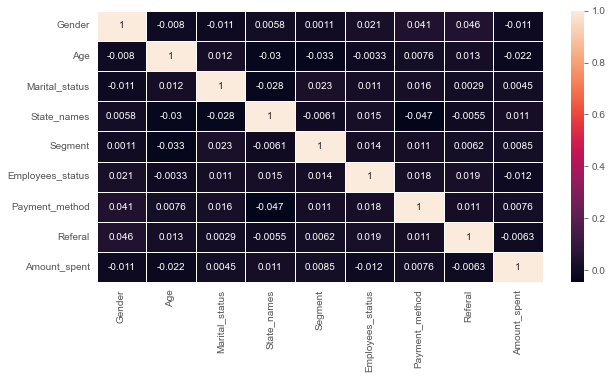

In [204]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True,lw=0.5)
plt.show()

In [208]:
## Set features and target data
X = df.iloc[:,:-1]
Y=df.iloc[:,-1]


In [209]:
X.head()

,Gender,Age,Marital_status,State_names,Segment,Employees_status,Payment_method,Referal
0,0,19.0,1,15,0,1,1,1.0
1,1,49.0,1,12,0,2,0,0.0
2,1,63.0,0,30,0,3,2,1.0
3,0,18.0,1,45,3,3,0,1.0
4,1,27.0,1,6,0,2,0,0.0


In [210]:
Y.head()

0    2051.360000
1     544.040000
2    1572.600000
3    1199.790000
4    1418.422577
Name: Amount_spent, dtype: float64

### Data Standardization

In [211]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

### Algorithm works

In [214]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [215]:
# train test split of the dataset
x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size=0.3, random_state=42)

### LinearRegression Model

In [218]:
# train the model
lr = LinearRegression()
lr.fit(x_train,y_train)

# test the model
lr_pred = lr.predict(x_test)
score = lr.score(x_test,y_test)
print('The model score is',format(score))

The model score is -0.005076678108327348
